In [1]:
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), '..'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from skimage.transform import rotate
from sklearn.datasets import fetch_openml

from src.main import main
from src.utils.visualizer import result_visualize

## Download test data

In [3]:
cifar10 = fetch_openml('CIFAR_10')

data = cifar10['data']
target = cifar10['target']

### Preview of image

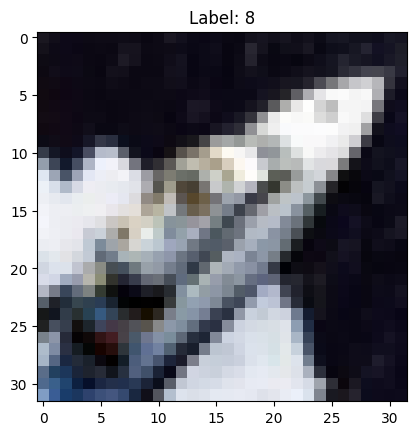

In [4]:
X = np.array(data).reshape(-1, 3, 32, 32).astype(np.uint8)

idx = 0
image = np.transpose(X[idx], (1, 2, 0))

# 画像を表示
plt.imshow(image)
plt.title(f'Label: {target[0]}')
plt.show()

## Generate test data

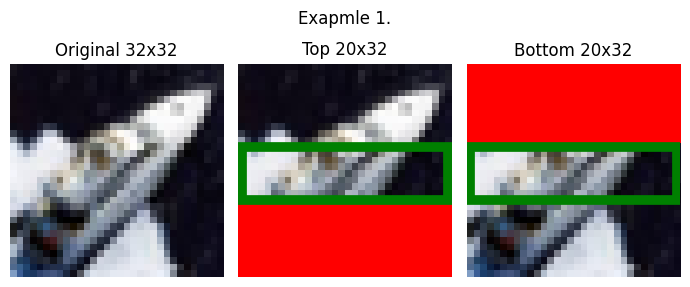

In [5]:
X = np.array(X).reshape(-1, 3, 32, 32).astype(np.uint8)
image = np.transpose(X[0], (1, 2, 0))

image_top = np.zeros_like(image)
image_top[:, :, 0] = 255
image_top[:20, :, :] = image[:20, :, :]
image_bottom = np.zeros_like(image)
image_bottom[:, :, 0] = 255
image_bottom[-20:, :, :] = image[-20:, :, :]

fig, ax = plt.subplots(1, 3, figsize=(7, 3))

ax[0].imshow(image)
ax[0].set_title("Original 32x32")
ax[0].axis('off')

ax[1].imshow(image_top)
ax[1].set_title("Top 20x32")
ax[1].axis('off')

ax[2].imshow(image_bottom)
ax[2].set_title("Bottom 20x32")
ax[2].axis('off')

rect_top = Rectangle((0, 12), 31, 8, linewidth=7, edgecolor='g', facecolor='none')
rect_bottom = Rectangle((0, 12), 31, 8, linewidth=7, edgecolor='g', facecolor='none')

ax[1].add_patch(rect_top)
ax[2].add_patch(rect_bottom)

fig.suptitle("Exapmle 1.")
fig.tight_layout()
plt.show()

plt.show()

## Image Sticher

### Example 1.


==== BEST RESULT ====
Best MSE: 1.3111979166666667
Best rotation: 270
image1's shape: (32, 20)
image2's shape: (32, 20)
shared image's top-left in image1: Coordinate(x=0, y=12)
shared image's bottom-right in image1: Coordinate(x=32, y=20)
shared image's top-left in (rotated) image2: Coordinate(x=0, y=0)
shared image's bottom-right in (rotated) image2: Coordinate(x=32, y=8)
shared image's height: 8
shared image's width: 32


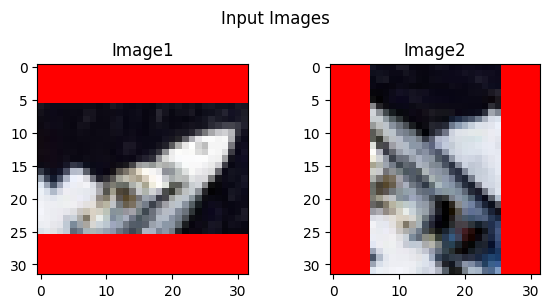

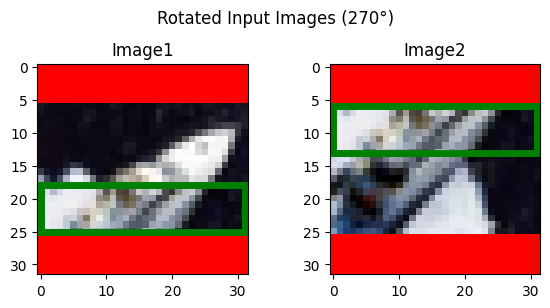

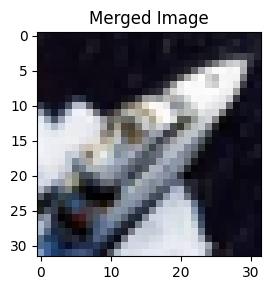

In [6]:
image_top = image[:20, :, :]
image_bottom = image[-20:, :, :]

image_bottom_rotated = rotate(image_bottom, 90, resize=True, preserve_range=True).astype(np.uint8)

merged_image, cand = main(image_top, image_bottom_rotated, min_overlap=(8, 8), verbose=False)
result_visualize(image_top, image_bottom_rotated, merged_image, cand)

### Example 2.

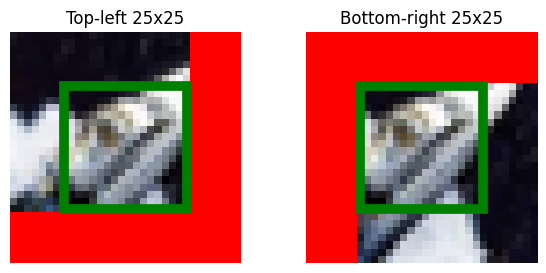

In [7]:
X = np.array(X).reshape(-1, 3, 32, 32).astype(np.uint8)
image = np.transpose(X[0], (1, 2, 0))

# viz_image21 = image.copy()
viz_image21 = np.zeros_like(image)
viz_image21[:, :, 0] = 255
viz_image21[:25, :25, :] = image[:25, :25, :]
viz_image22 = np.zeros_like(image)
viz_image22[:, :, 0] = 255
viz_image22[7:, 7:, :] = image[7:, 7:, :]

fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].imshow(viz_image21)
ax[0].set_title("Top-left 25x25")
ax[0].axis('off')

ax[1].imshow(viz_image22)
ax[1].set_title("Bottom-right 25x25")
ax[1].axis('off')

rect_top = Rectangle((7, 7), 17, 17, linewidth=7, edgecolor='g', facecolor='none')
rect_bottom = Rectangle((7, 7), 17, 17, linewidth=7, edgecolor='g', facecolor='none')

ax[0].add_patch(rect_top)
ax[1].add_patch(rect_bottom)


==== BEST RESULT ====
Best MSE: 1.0895061728395061
Best rotation: 180
image1's shape: (25, 25)
image2's shape: (25, 25)
shared image's top-left in image1: Coordinate(x=7, y=7)
shared image's bottom-right in image1: Coordinate(x=25, y=25)
shared image's top-left in (rotated) image2: Coordinate(x=0, y=0)
shared image's bottom-right in (rotated) image2: Coordinate(x=18, y=18)
shared image's height: 18
shared image's width: 18


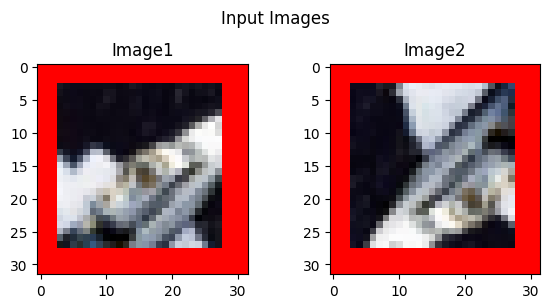

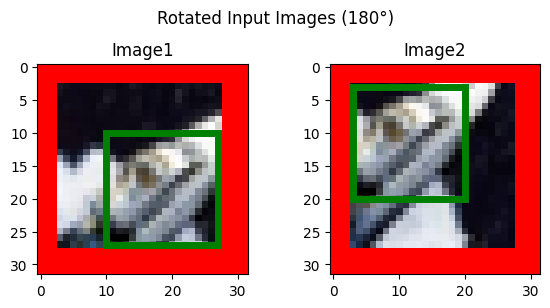

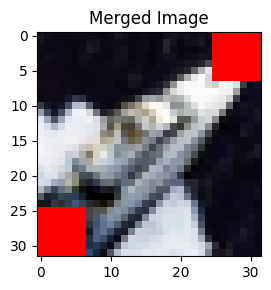

In [8]:
image21 = image[:25, :25, :]
image22 = image[7:, 7:, :]

image22_rotated = rotate(image22, 180, resize=True, preserve_range=True).astype(np.uint8)

merged_image, cand = main(image21, image22_rotated, min_overlap=(8, 8), verbose=False)
result_visualize(image21, image22_rotated, merged_image, cand)